# Data Analysis of Drug-Related Mortality in the United States

Data source: https://www.kaggle.com/ruchi798/drug-overdose-deaths

The dataset contains information on drug overdose deaths in Connecticut between 2012 and 2018. It includes demographic information such as age, sex, and race, as well as information about the type and amount of drugs involved in the deaths. The goal of the dataset is to provide insight into the factors contributing to drug overdose deaths in Connecticut and to help inform public health policy and interventions.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

# Suppress warnings
import os
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning,ignore::ConvergenceWarning'

# Data Exploration

In [42]:
df = pd.read_csv('data/drug_deaths.csv')
print("DF Shape: {} Rows, {} Columns".format(*df.shape))
df.head(20)

DF Shape: 5105 Rows, 42 Columns


,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
5,5,14-0277,06/29/2014 12:00:00 AM,0.0,23.0,Male,White,BRISTOL,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)"
6,6,12-0205,08/12/2012 12:00:00 AM,0.0,21.0,Female,White,WEST HARTFORD,HARTFORD,NaN,...,0,0,0,NaN,0,0,Accident,"WEST HARTFORD, CT\n(41.762008, -72.741807)","WEST HARTFORD, CT\n(41.762008, -72.741807)","CT\n(41.575155, -72.738288)"
7,7,13-0404,11/10/2013 12:00:00 AM,0.0,40.0,Female,White,HAMDEN,NEW HAVEN,NaN,...,0,0,0,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","HAMDEN, CT\n(41.382918, -72.907743)","CT\n(41.575155, -72.738288)"
8,8,12-0107,04/25/2012 12:00:00 AM,0.0,40.0,Male,White,EAST HARTFORD,HARTFORD,NaN,...,0,0,0,NaN,0,0,Accident,"EAST HARTFORD, CT\n(41.769319, -72.643785)","EAST HARTFORD, CT\n(41.769319, -72.643785)","CT\n(41.575155, -72.738288)"
9,9,13-0161,05/15/2013 12:00:00 AM,0.0,50.0,Male,White,MONTVILLE,NEW LONDON,NaN,...,0,0,0,NaN,0,0,Accident,"MONTVILLE, CT\n(41.45303, -72.136336)","MONTVILLE, CT\n(41.45303, -72.136336)","CT\n(41.575155, -72.738288)"


| Column Number | Column Name        | Description (English)                                                   | Description (Ukrainian)                                                      |
|---------------|--------------------|-------------------------------------------------------------------------|------------------------------------------------------------------------------|
| 0             | ID                 | Identification number                                                   | Ідентифікаційний номер                                                       |
| 1             | Date               | Date when the event occurred                                            | Дата коли стався випадок                                                     |
| 2             | DateType           | Type of the date                                                        | Тип дати                                                                     |
| 3             | Age                | Age of the individual                                                    | Вік особи                                                                    |
| 4             | Sex                | Sex of the individual                                                    | Стать особи                                                                  |
| 5             | Race               | Race of the individual                                                   | Раса особи                                                                   |
| 6             | ResidenceCity      | City where the individual resided                                       | Місто проживання особи                                                       |
| 7             | ResidenceCounty    | County where the individual resided                                     | Округ проживання особи                                                       |
| 8             | ResidenceState     | State where the individual resided                                      | Штат проживання особи                                                        |
| 9             | DeathCity          | City where the individual died                                          | Місто смерті особи                                                           |
| 10            | DeathCounty        | County where the individual died                                        | Округ смерті особи                                                           |
| 11            | Location           | Location where the individual died                                      | Місце смерті особи                                                           |
| 12            | LocationifOther    | Additional information about the location where the individual died     | Додаткова інформація про місце смерті особи                                 |
| 13            | DescriptionofInjury| Description of the injury                                               | Опис травми                                                                  |
| 14            | InjuryPlace        | Place where the injury occurred                                         | Місце травми                                                                 |
| 15            | InjuryCity         | City where the injury occurred                                          | Місто травми                                                                 |
| 16            | InjuryCounty       | County where the injury occurred                                        | Округ травми                                                                 |
| 17            | InjuryState        | State where the injury occurred                                         | Штат травми                                                                  |
| 18            | COD                | Cause of death                                                           | Причина смерті                                                               |
| 19            | OtherSignifican    | Other significant conditions                                            | Інші значні стани                                                            |
| 20            | Heroin             | Presence of heroin                                                      | Наявність героїну                                                            |
| 21            | Cocaine            | Presence of cocaine                                                     | Наявність кокаїну                                                            |
| 22            | Fentanyl           | Presence of fentanyl                                                    | Наяв
| 23            | Fentanyl_Analogue  | Presence of fentanyl analogues                                          | Наявність аналогів фентанілу                                                 |
| 24            | Oxycodone          | Presence of oxycodone                                                   | Наявність оксикодону                                                         |
| 25            | Oxymorphone        | Presence of oxymorphone                                                 | Наявність оксиморфону                                                        |
| 26            | Ethanol            | Presence of ethanol                                                     | Наявність етанолу                                                            |
| 27            | Hydrocodone        | Presence of hydrocodone                                                 | Наявність гідрокодону                                                        |
| 28            | Benzodiazepine     | Presence of benzodiazepine                                              | Наявність бензодіазепінів                                                    |
| 29            | Methadone          | Presence of methadone                                                   | Наявність метадону                                                           |
| 30            | Amphet             | Presence of amphetamines                                                | Наявність амфетамінів                                                        |


In [43]:
print("Column names:")
df.info()

Column names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          503

In [44]:
print("Number of missing values for each column:")
# show as a dataframe table with two columns and sort by number of missing values
missing_values = df.isnull().sum().to_frame().sort_values(by=0, ascending=False)
missing_values.columns = ['Number of missing values']
#missing_values.sort_values(by='Number of missing values', ascending=False)
missing_values

Number of missing values for each column:


,Number of missing values
OtherSignifican,4936
Other,4670
LocationifOther,4515
InjuryState,3681
InjuryCounty,2741
InjuryCity,1756
ResidenceState,1549
DeathCounty,1100
ResidenceCounty,797
DescriptionofInjury,780


In [45]:
print("Number of unique values for each column:")
# show as a dataframe table with two columns
unique_values = df.nunique().to_frame()
unique_values.columns = ['Number of unique values']
unique_values

Number of unique values for each column:


,Number of unique values
Unnamed: 0,5105
ID,5105
Date,2098
DateType,2
Age,65
Sex,3
Race,11
ResidenceCity,370
ResidenceCounty,84
ResidenceState,26


# Data Cleaning and Normalization

In [46]:
# filter out columns Date, DataType, Age, Sex, Race with missing values
df_ = df.replace(['Unknow', 'Unknown', 'nan'], np.nan)
filtered_df = df_.dropna(subset=['Date', 'DateType', 'Age', 'Sex', 'Race', 'InjuryState'])
print("Number of unique values for each column:")
unique_values_filtered = filtered_df.nunique().to_frame().sort_values(by=0, ascending=True)
unique_values_filtered.columns = ['Number of unique values']
unique_values_filtered

Number of unique values for each column:


,Number of unique values
DateType,1
Tramad,2
Amphet,2
Heroin,2
Cocaine,2
Fentanyl_Analogue,2
Oxycodone,2
Hydromorphone,2
Oxymorphone,2
OpiateNOS,2


In [47]:
unique_values_data = []

for column in filtered_df.columns:
    unique_values = filtered_df[column].unique()
    if len(unique_values) < 5:
        unique_values_data.append([column, unique_values])

unique_values_df = pd.DataFrame(unique_values_data, columns=['Column', 'Unique Values'])
display(unique_values_df)


,Column,Unique Values
0,DateType,[1.0]
1,Sex,"[Female, Male]"
2,InjuryState,"[CT, NY, CONNECTICUT]"
3,Heroin,"[0, 1]"
4,Cocaine,"[0, 1]"
5,Fentanyl,"[0, 1, 1-A]"
6,Fentanyl_Analogue,"[0.0, 1.0]"
7,Oxycodone,"[0, 1]"
8,Oxymorphone,"[0, 1]"
9,Ethanol,"[0, 1]"


In [48]:
filtered_df['COD'].value_counts()

Acute Fentanyl Intoxication                                                                           56
Acute Heroin Intoxication                                                                             32
Acute Heroin Toxicity                                                                                 21
Acute Intoxication due to the Combined Effects of Fentanyl and Heroin                                 18
Acute Cocaine Intoxication                                                                            14
                                                                                                      ..
Acute Intoxication Combined Effects of Ethanol, Fentanyl, and Heroin                                   1
Fentanyl, Heroin, and Cocaine.                                                                         1
Multidrug Toxicity Including Ethanol, Cocaine, Cocaethylene, Fentanyl, Acetyl Fentanyl, and Heroin     1
Multidrug Toxicity Including Cocaine, Fentanyl, Methado

# Race normalization
I'm not a racist. I just happened to graduate with a degree in pharmaceutical education, and I know that race plays an important role in real pharmaceutical research, as there can be differences in biochemistry and metabolism between different racial groups.

In [49]:
def normalize_race(race):
    if 'White' in race:
        return 'White'
    elif 'Black' in race:
        return 'Black'
    elif 'Asian' in race:
        return 'Asian'
    else:
        return 'Other'

filtered_df['NormalizedRace'] = filtered_df['Race'].apply(normalize_race)
filtered_df = filtered_df[filtered_df['NormalizedRace'] != 'Other']

print('Race Before normalization:')
print('---------------------------------')
print(filtered_df['Race'].value_counts())
print('')
print('Race After normalization:')
print('---------------------------------')
print(filtered_df['NormalizedRace'].value_counts())

Race Before normalization:
---------------------------------
White              1145
Hispanic, White     147
Black               101
Hispanic, Black      10
Asian Indian          6
Asian, Other          4
Name: Race, dtype: int64

Race After normalization:
---------------------------------
White    1292
Black     111
Asian      10
Name: NormalizedRace, dtype: int64


In [50]:
numeric_columns = df.describe()
print("Numeric column statistics:")
print(numeric_columns)

Numeric column statistics:
        Unnamed: 0     DateType          Age       Heroin      Cocaine  \
count  5105.000000  5103.000000  5102.000000  5105.000000  5105.000000   
mean   2552.000000     0.446992    41.964916     0.495397     0.297943   
std    1473.830893     0.497231    12.336639     0.500028     0.457399   
min       0.000000     0.000000    14.000000     0.000000     0.000000   
25%    1276.000000     0.000000    32.000000     0.000000     0.000000   
50%    2552.000000     0.000000    42.000000     0.000000     0.000000   
75%    3828.000000     1.000000    52.000000     1.000000     1.000000   
max    5104.000000     1.000000    87.000000     1.000000     1.000000   

       Fentanyl_Analogue    Oxycodone  Oxymorphone      Ethanol  Hydrocodone  \
count        5105.000000  5105.000000  5105.000000  5105.000000  5105.000000   
mean            0.076200     0.118903     0.021156     0.244270     0.023115   
std             0.265344     0.323706     0.143917     0.429696   

# Feature Engineering

In [51]:
drug_columns = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone',
                'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
                'OpiateNOS', 'AnyOpioid']
# Define a mapping dictionary for general drug categories
drug_mapping = {
    'Heroin': 'Opioid',
    'Cocaine': 'Stimulant',
    'Fentanyl': 'Opioid',
    'Fentanyl_Analogue': 'Opioid',
    'Oxycodone': 'Opioid',
    'Oxymorphone': 'Opioid',
    'Ethanol': 'Depressant',
    'Hydrocodone': 'Opioid',
    'Benzodiazepine': 'Depressant',
    'Methadone': 'Opioid',
    'Amphet': 'Stimulant',
    'Tramad': 'Opioid',
    'Morphine_NotHeroin': 'Opioid',
    'Hydromorphone': 'Opioid',
    'Other': 'Other',
    'OpiateNOS': 'Opioid',
    'AnyOpioid': 'Opioid'
}
def get_drug_type(row):
    for col in drug_columns:
        if row[col] == 1:
            return col
    return np.nan




filtered_df['DrugType'] = filtered_df.apply(get_drug_type, axis=1)
filtered_df = filtered_df.dropna(subset=['DrugType'])
# Map the drug types to more general categories
filtered_df['GeneralDrugType'] = filtered_df['DrugType'].map(drug_mapping)
filtered_df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,NormalizedRace,DrugType,GeneralDrugType
21,21,15-0263,06/02/2015 12:00:00 AM,1.0,39.0,Female,White,ANSONIA,NEW HAVEN,CT,...,NaN,0,1,Accident,"Derby, CT\n(41.322959, -73.089594)","ANSONIA, CT\n(41.34198, -73.078296)","ANSONIA, CT\n(41.34198, -73.078296)",White,Methadone,Opioid
25,25,17-0817,10/13/2017 12:00:00 AM,1.0,25.0,Male,White,MERIDEN,NEW HAVEN,CT,...,NaN,0,0,Accident,"Meriden, CT\n(41.537589, -72.8011)","MERIDEN, CT\n(41.537589, -72.8011)","MERIDEN, CT\n(41.537589, -72.8011)",White,Heroin,Opioid
34,34,17-0907,11/16/2017 12:00:00 AM,1.0,40.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,...,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","NEW HAVEN, CT\n(41.308252, -72.924161)","NEW HAVEN, CT\n(41.308252, -72.924161)",Black,Heroin,Opioid
35,35,15-0475,09/14/2015 12:00:00 AM,1.0,51.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,...,NaN,0,1,Accident,"MIDDLETOWN, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)",White,Ethanol,Depressant
38,38,15-0687,12/07/2015 12:00:00 AM,1.0,56.0,Male,Black,WATERBURY,NEW HAVEN,CT,...,NaN,0,0,accident,"Waterbury, CT\n(41.554261, -73.043069)","WATERBURY, CT\n(41.554261, -73.043069)","WATERBURY, CT\n(41.554261, -73.043069)",Black,Cocaine,Stimulant


# Data Visualization

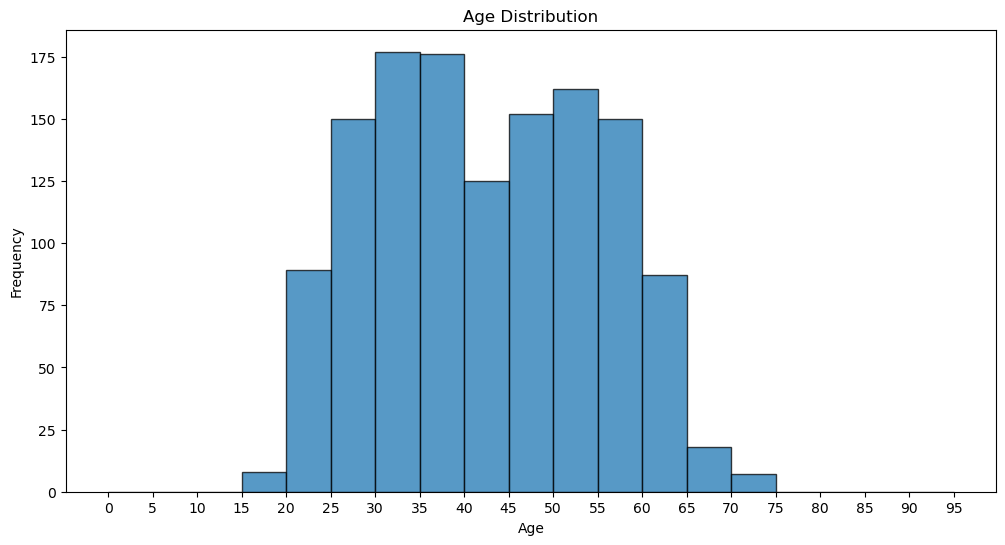

In [52]:
# Plotting histogram for the 'Age' column
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['Age'], bins=range(0, 100, 5), alpha=0.75, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 100, 5))
plt.show()

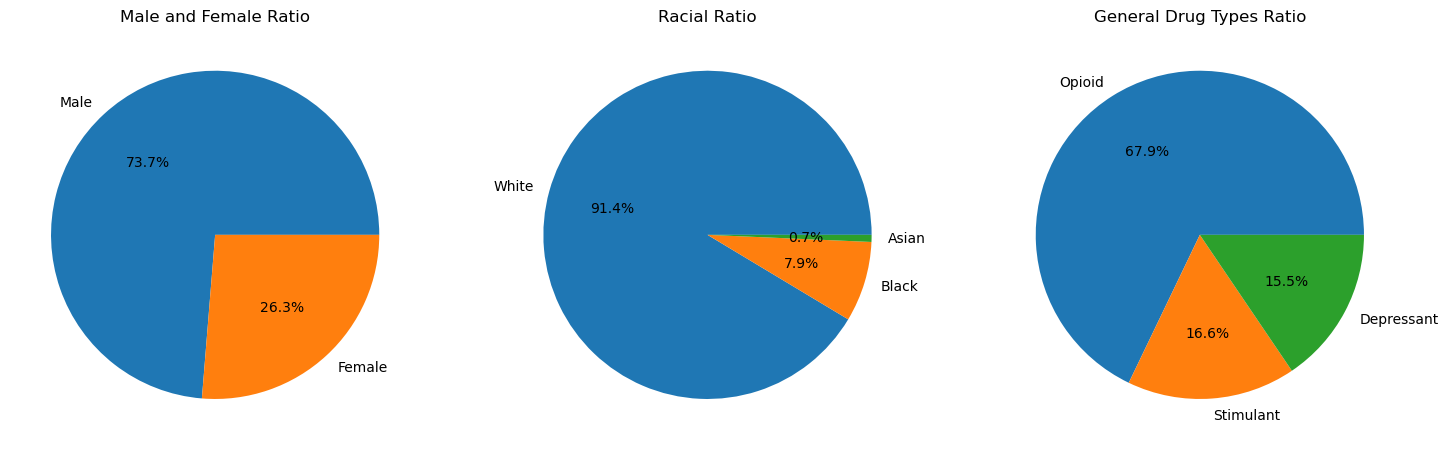

In [53]:

# Male and female ratio
sex_counts = filtered_df['Sex'].value_counts()

# Racial ratio
race_counts = filtered_df['NormalizedRace'].value_counts()

# GeneralDrugType ratio
general_drug_type_counts = filtered_df['GeneralDrugType'].value_counts()

# DrugType ratio
drug_type_counts = filtered_df['DrugType'].value_counts()

# Displaying pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
ax1.set_title('Male and Female Ratio')

ax2.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
ax2.set_title('Racial Ratio')

ax3.pie(general_drug_type_counts, labels=general_drug_type_counts.index, autopct='%1.1f%%')
ax3.set_title('General Drug Types Ratio')

plt.show()

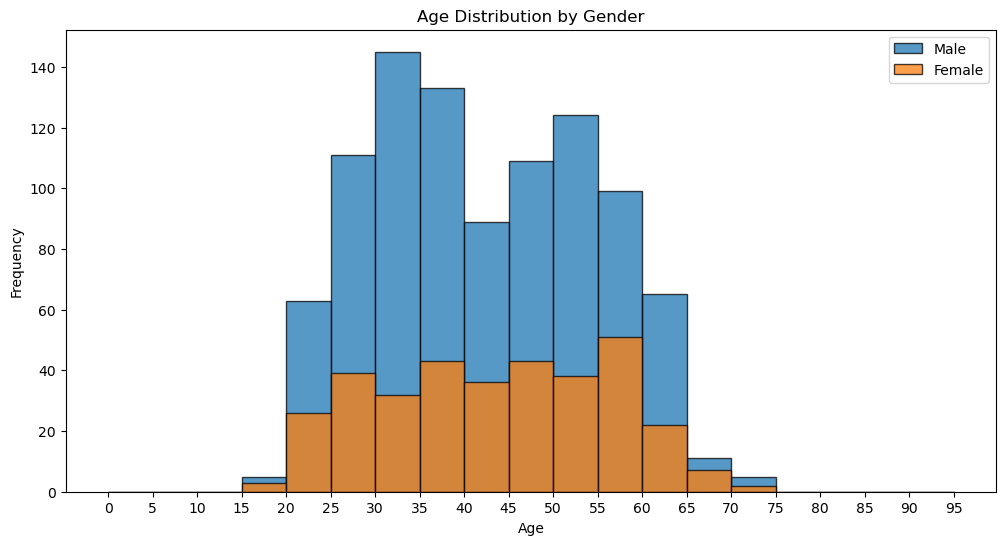

In [54]:
# Separating male and female data
male_data = filtered_df[filtered_df['Sex'] == 'Male']
female_data = filtered_df[filtered_df['Sex'] == 'Female']

# Plotting histograms for male and female age distribution
plt.figure(figsize=(12, 6))

plt.hist(male_data['Age'], bins=range(0, 100, 5), alpha=0.75, edgecolor='black', label='Male')
plt.hist(female_data['Age'], bins=range(0, 100, 5), alpha=0.75, edgecolor='black', label='Female')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 100, 5))
plt.legend()
plt.show()


# Some additional Features engineering
**DayOfWeek** - day of the week of the death, with Monday=0 and Sunday=6
**MonthOfYear** - month of the death, with January=1 and December=12
**AgeGroup** - age group of the deceased based on the Age feature
**Sex_Age** - combination of Sex and Age, indicating the age and gender of the deceased.

In [55]:
# Convert the 'Date' column to datetime
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Extract the day of the week from the 'Date' column
filtered_df['DayOfWeek'] = filtered_df['Date'].dt.dayofweek

# Extract the month of the year from the 'Date' column
filtered_df['MonthOfYear'] = filtered_df['Date'].dt.month

# Create new features or transform existing ones
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['<18', '18-35', '36-50', '51-65', '65+']
filtered_df['AgeGroup'] = pd.cut(filtered_df['Age'], bins=bins, labels=labels)
filtered_df['Sex_Age'] = filtered_df['Sex'] + '_' + filtered_df['AgeGroup'].astype(str)
sex_dummies = pd.get_dummies(filtered_df['Sex'], prefix='Sex')
race_dummies = pd.get_dummies(filtered_df['NormalizedRace'], prefix='Race')
age_group_dummies = pd.get_dummies(filtered_df['AgeGroup'], prefix='AgeGroup')
sex_age_dummies = pd.get_dummies(filtered_df['Sex_Age'], prefix='Sex_Age')
filtered_df = pd.concat([filtered_df, sex_dummies, race_dummies, age_group_dummies, sex_age_dummies], axis=1)

# Drop original categorical columns
filtered_df.head()


,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Sex_Age_Female_18-35,Sex_Age_Female_36-50,Sex_Age_Female_51-65,Sex_Age_Female_65+,Sex_Age_Female_<18,Sex_Age_Male_18-35,Sex_Age_Male_36-50,Sex_Age_Male_51-65,Sex_Age_Male_65+,Sex_Age_Male_<18
21,21,15-0263,2015-06-02,1.0,39.0,Female,White,ANSONIA,NEW HAVEN,CT,...,0,1,0,0,0,0,0,0,0,0
25,25,17-0817,2017-10-13,1.0,25.0,Male,White,MERIDEN,NEW HAVEN,CT,...,0,0,0,0,0,1,0,0,0,0
34,34,17-0907,2017-11-16,1.0,40.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,0,1,0,0,0
35,35,15-0475,2015-09-14,1.0,51.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,...,0,0,0,0,0,0,0,1,0,0
38,38,15-0687,2015-12-07,1.0,56.0,Male,Black,WATERBURY,NEW HAVEN,CT,...,0,0,0,0,0,0,0,1,0,0


In [56]:
features = ['Age', 'AgeGroup', 'Sex', 'Sex_Age', 'NormalizedRace', 'DayOfWeek', 'MonthOfYear']
target = 'GeneralDrugType'

# One-hot encoding categorical features
X = pd.get_dummies(filtered_df[features], drop_first=True)
y = filtered_df[target]

# Find columns with NaN values
y.isna().sum()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Train and evaluate classifiers
for classifier in [lr, rf, knn]:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__} accuracy: {accuracy:.3f}")


LogisticRegression accuracy: 0.705
RandomForestClassifier accuracy: 0.625
KNeighborsClassifier accuracy: 0.617


Based on the results, the Logistic Regression model has the highest accuracy (0.705) compared to the Random Forest Classifier (0.625) and the K-Nearest Neighbors Classifier (0.617).

Optimal number of features:  2
Feature ranking:

1. Age: 18
2. DayOfWeek: 17
3. MonthOfYear: 16
4. AgeGroup_18-35: 15
5. AgeGroup_36-50: 14
6. AgeGroup_51-65: 13
7. AgeGroup_65+: 6
8. Sex_Male: 9
9. Sex_Age_Female_36-50: 5
10. Sex_Age_Female_51-65: 3
11. Sex_Age_Female_65+: 1
12. Sex_Age_Female_<18: 2
13. Sex_Age_Male_18-35: 7
14. Sex_Age_Male_36-50: 11
15. Sex_Age_Male_51-65: 12
16. Sex_Age_Male_65+: 4
17. Sex_Age_Male_<18: 10
18. NormalizedRace_Black: 1
19. NormalizedRace_White: 8


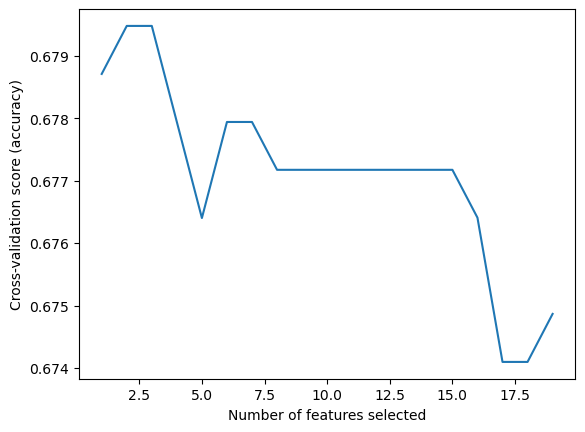

In [57]:
# Create the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Create the RFE object with cross-validation
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFE object to the data
rfecv.fit(X, y)

# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)

# Print the ranking of features
print("Feature ranking:\n")
for i, (feature, rank) in enumerate(zip(X.columns, rfecv.ranking_)):
    print(f"{i+1}. {feature}: {rank}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

plt.show()

Based on the output, it seems that the most important features affecting the target variable are:
Age
DayOfWeek
MonthOfYear
AgeGroup_18-35
AgeGroup_36-50

In [58]:
# Select the top features
top_features = ['Age', 'DayOfWeek', 'MonthOfYear', 'AgeGroup_18-35', 'AgeGroup_36-50']
X_top_features = X[top_features]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Create classifiers
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Train and evaluate classifiers with top features
for classifier in [lr, rf, knn]:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__} accuracy with top features: {accuracy:.3f}")


LogisticRegression accuracy with top features: 0.693
RandomForestClassifier accuracy with top features: 0.598
KNeighborsClassifier accuracy with top features: 0.628


the Logistic Regression model has the highest accuracy (0.705)

In [59]:
# Define the parameter grid for Logistic Regression

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform Grid Search with Cross Validation
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
print('-' * 60)
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)
print('-' * 60)

# Evaluate the best model on the test set
best_lr = grid_search_lr.best_estimator_
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy with best parameters: {accuracy:.3f}")
print('-' * 60)


/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 a

------------------------------------------------------------
Best Parameters: {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.6750000000000002
------------------------------------------------------------
Logistic Regression accuracy with best parameters: 0.693
------------------------------------------------------------


/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/sash/.conda/envs/drug_overdose_deaths_analysis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [60]:
features = ['Age', 'DayOfWeek']
target = 'GeneralDrugType'

# One-hot encode categorical features
X = pd.get_dummies(filtered_df[features], drop_first=True)
y = filtered_df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model with best parameters
model = LogisticRegression(C=0.0001, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Use the trained model to make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy with best parameters: {accuracy:.3f}")

Logistic Regression accuracy with best parameters: 0.693


Ця курсова робота була спробою серйозного наукового відкриття :)), та стала додатковою мотивацією для вивчення датасайнс. Я дослідив набір даних про смерті від передозування наркотиками в США та провів аналіз, щоб виявити закономірності у цих даних.

Незважаючи на те, що моя робота не є закінченою, я вважаю, що вона стала хорошою платформою для подальших досліджень. Було цікаво досліджувати зв'язок між смертю від наркотиків та віком людини, порою року та дня неділі. Тут пропущенно більш тонкий підбір параметрів та наочна візуалізація за браком часу по особистих причинах.